AQUI SE TRABAJA EL Analisis de data exploratorio (EDA)
- josu and gotzon

# PROBLEM DEFINITION

The bank customer churn dataset is a CSV file which contains information about a study related to customer churn in a banking institution. The information is divided into 13 different variables, organized in 13 columns, being the first one the number of rows.

The attributes analyzed by this study is splitted into the different columns, which are:

QUANTITATIVE VARIABLES: Customer identification: a unique id for each customer. Age: Customer’s age. Credit Score: A value between 300 and 850 which expresses the level of probability of a customer to pay off the debt to the bank. Tenure: Number of years a customer has been a client of the bank. Account Balance: Customer account balance. Estimated yearly salary: An estimation of the customers salary. QUALITATIVE VARIABLES Surname: Surname of the customer. Geography: Country where the customer lives. BOOLEAN VARIABLES (1 for Yes, 0 for No): HasCrCard: If customer has or not a Credit Card IsActiveMember: If the customer is an active member or not Exited: If the customer has exited the bank. Gender: If the customer is male or female.

The primary task that we are going to be intending to solve is to apply what we are going to be learning during the course such as: machine learning techniques, training processes,...In order to build and train a model capable of learning and predicting when a customer is more likely to exit the banking platform.

# 0. Libraries importation

In [1]:
# Load libraries
import pandas as pd
import numpy as np 
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Dataset import

In [2]:
data = pd.read_csv(r'src\rawDataset.csv')
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


# 2. Exploratory Data Analysis (EDA)

- Dimensions of the dataset

In [3]:
data.shape

(10000, 18)

- Column data types

In [4]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

- Missing values

In [5]:
print(data.isnull().sum())

RowNumber             0
CustomerId            0
Surname               0
CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
dtype: int64


Result: 

There are no null values in the dataset, which facilitates the task.

- Duplicated rows

In [6]:
duplicates = data.duplicated().sum()
if duplicates > 0:
    print(f"There are {duplicates} duplicated rows in the dataset.")
else:
    print("No duplicated rows found in the dataset.")

data.drop(columns=['RowNumber','Surname','CustomerId'], inplace= True)

No duplicated rows found in the dataset.


- Categorical and Numerical columns

In [10]:
numericData = data.select_dtypes(include=[np.number])
numericData.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned
0,619,42,2,0.00,1,1,1,101348.88,1,1,2,464
1,608,41,1,83807.86,1,0,1,112542.58,0,1,3,456
2,502,42,8,159660.80,3,1,0,113931.57,1,1,3,377
3,699,39,1,0.00,2,0,0,93826.63,0,0,5,350
4,850,43,2,125510.82,1,1,1,79084.10,0,0,5,425


In [11]:
categoricData = data.select_dtypes(exclude=[np.number])
categoricData.head()

,Geography,Gender,Card Type
0,France,Female,DIAMOND
1,Spain,Female,DIAMOND
2,France,Female,DIAMOND
3,France,Female,GOLD
4,Spain,Female,GOLD


- Correlation matrix

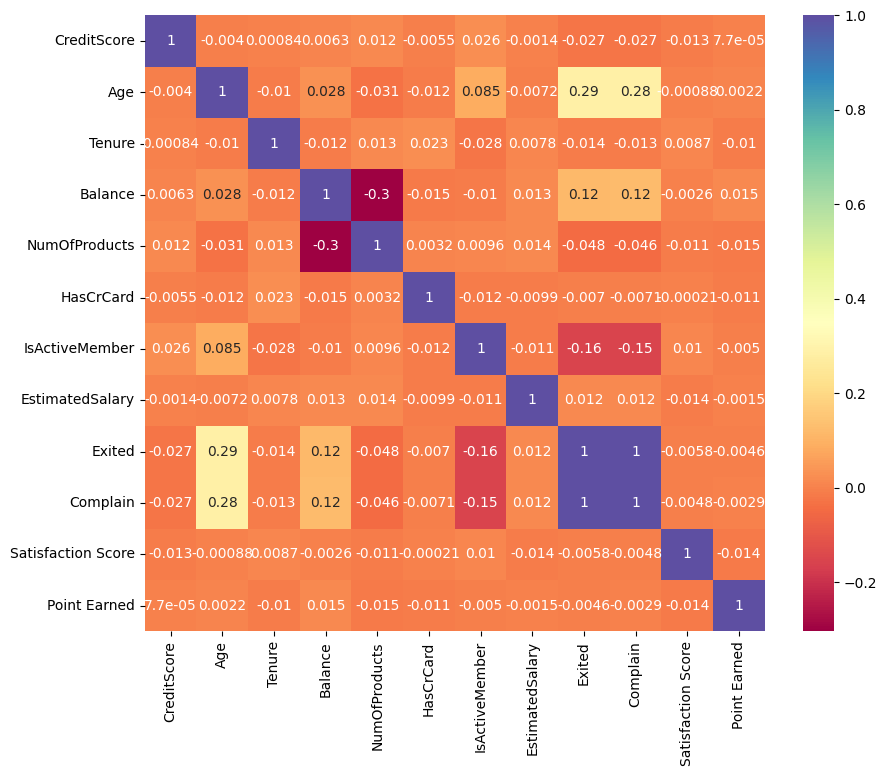

In [13]:
corr_matrix = numericData.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap= "Spectral")
plt.show()

Results: 

The heat map shows that most of the variables dont have a significant correlation value between them, except for these:
    Complain / Exit: The +1 correlation value shows that everyone who complained, ended up leaving.
    Age / Exit: +0.29 tells that there is a correlation, where, the older someone is, the more likely is that person to leave.  
    NumOfProducts / Balance : Its the highest -0.3 negative correlation, it means that people with more products tend to have a lower balance.


- Atipic and outlier values detection

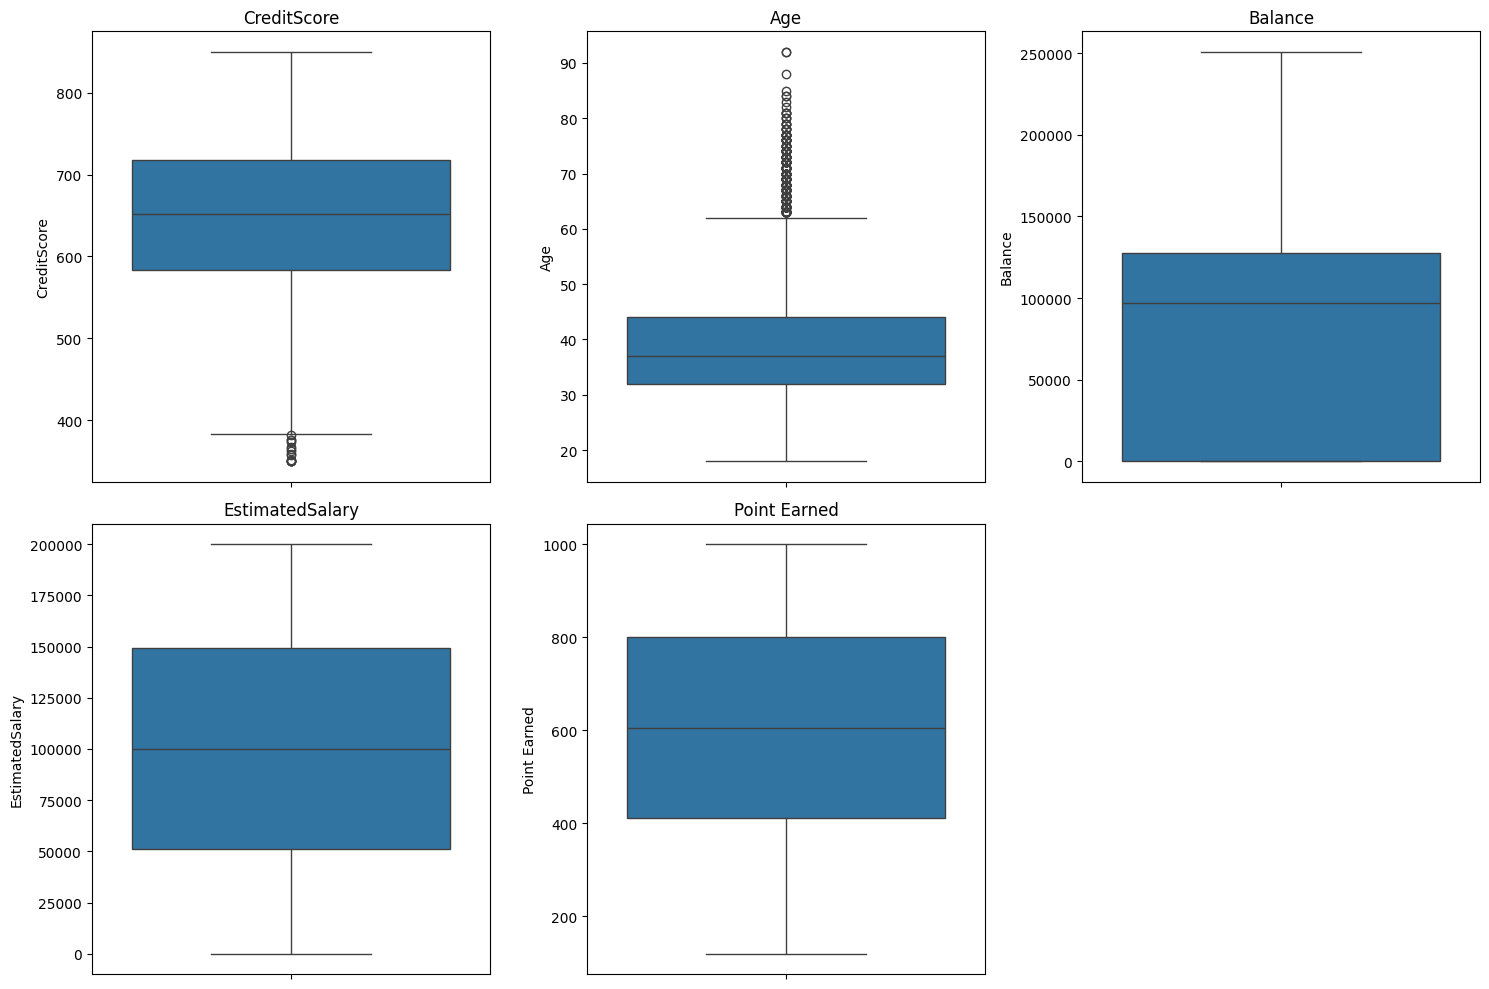

In [ ]:

numeric_columns = ["CreditScore", "Age", "Balance", "EstimatedSalary", "Point Earned"]
plt.figure(figsize=(15, 10))

for i, column in enumerate(numeric_columns, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=data[column])
    plt.title(column)

plt.tight_layout()
plt.show()

Result:

Credit Score: Some outliers under 400 (points)
    
Age: Some over 60 (yers old)
    
Others: Not significative

- Available Outlier Management Methods:
sigo luego

- Inconsistent data corrections

In [ ]:
#inconsistent data corrections

# 3. Data Transformation

- Data type conversion

In [ ]:
#data type conversion

- Data normalization and standardization

In [ ]:
#data normalization and standardization

- New variables creation

In [ ]:
#new variables creation

# 4. Uni, Bi and multivaraint analisis

relation between variants

In [ ]:
#relation between variants

PCA? no

# 5. Data Visualization

In [ ]:
#data visualization

# 6. CONCLUSSIONS